In [109]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

characters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!@#$%^&()')
# Parameters
image_size = (200, 200)
input_shape = (*image_size, 4)  # 4 for RGBA
n_classes = len(characters)
batch_size = 8 
epochs = 15

# Load the image data
image_files = []
labels = []
for char in characters:
    for num in range(2, 5):
        filename = f'distorted_outlined_{char}_{num}.png'
        if os.path.exists(filename):
            img = load_img(filename, target_size=image_size, color_mode='rgba')
            img_array = img_to_array(img)
            image_files.append(img_array)
            labels.append(char)
        else:
            print(f"File not found: {filename}")
encoder = OneHotEncoder(categories=[characters], handle_unknown='ignore')

labels = np.array(labels).reshape(-1, 1)
labels = encoder.fit_transform(labels).toarray()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.36, random_state=42, stratify=labels)



# Build the model with increased complexity and regularization
model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes, activation='softmax')
])

# Compile the model with a lower learning rate
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(datagen.flow(np.array(X_train), np.array(y_train), batch_size=batch_size),
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_test), np.array(y_test)),
          callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('trained_model.h5')

y_pred = model.predict(np.array(X_test))
predicted_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
true_classes = np.argmax(np.array(y_test), axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_classes, predicted_classes)

# Convert predicted_classes and true_classes back to one-hot-encoded form
predicted_classes_onehot = keras.utils.to_categorical(predicted_classes, num_classes=n_classes)
true_classes_onehot = keras.utils.to_categorical(true_classes, num_classes=n_classes)

# Inverse transform the labels
predicted_classes_labels = encoder.inverse_transform(predicted_classes_onehot)
true_classes_labels = encoder.inverse_transform(true_classes_onehot)

# Map from index to original labels
index_to_label_map = {i: char for i, char in enumerate(characters)}

predicted_classes_labels = [index_to_label_map[i] for i in predicted_classes]
true_classes_labels = [index_to_label_map[i] for i in true_classes]

# Compute the confusion matrix with original labels
confusion_mat_labels = confusion_matrix(true_classes_labels, predicted_classes_labels)

# Print the confusion matrix
import numpy as np

# Assuming 'confusion_mat' is the confusion matrix
np.set_printoptions(threshold=np.inf)  # Set the threshold to infinity to print the entire matrix
print("Confusion Matrix:")
print(confusion_mat_labels)


Epoch 1/15


C:\Users\lbowe\AppData\Roaming\Python\Python38\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


11/11 [==============================] - 28s 3s/step - loss: 56.3086 - accuracy: 0.0233 - val_loss: 3.7933 - val_accuracy: 0.0612
Epoch 2/15
11/11 [==============================] - 27s 3s/step - loss: 3.7982 - accuracy: 0.0465 - val_loss: 3.8038 - val_accuracy: 0.0408
Epoch 3/15
11/11 [==============================] - 27s 3s/step - loss: 3.7883 - accuracy: 0.0233 - val_loss: 3.7515 - val_accuracy: 0.1633
Epoch 4/15
11/11 [==============================] - 28s 3s/step - loss: 3.5827 - accuracy: 0.0698 - val_loss: 2.8973 - val_accuracy: 0.4490
Epoch 5/15
11/11 [==============================] - 27s 3s/step - loss: 2.8917 - accuracy: 0.2093 - val_loss: 2.0507 - val_accuracy: 0.5714
Epoch 6/15
11/11 [==============================] - 27s 3s/step - loss: 2.4089 - accuracy: 0.3953 - val_loss: 1.6291 - val_accuracy: 0.5918
Epoch 7/15
11/11 [==============================] - 27s 3s/step - loss: 1.8234 - accuracy: 0.4302 - val_loss: 1.2067 - val_accuracy: 0.6327
Epoch 8/15
11/11 [============

In [112]:

print(encoder.categories_)
#print(len(labels[:10]))
print(labels[:10])
print(np.unique(y_train, axis=0))
print(np.unique(y_test, axis=0))


#print(np.unique(predicted_classes, return_counts=True))

unique, counts = np.unique(predicted_classes, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(predicted_classes, return_counts=True)
print(dict(zip(unique, counts)))

for index, label in enumerate(encoder.categories_[0]):
    print(f"Index {index} corresponds to label '{label}'")






[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '!', '@', '#',
       '$', '%', '^', '&', '(', ')'], dtype='<U1')]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [65]:
print(f"Number of unique labels before any transformation: {len(labels)}")


print(f"Number of unique classes in y_train before one-hot encoding: {len(y_train)}")
print(f"Number of unique classes in y_test before one-hot encoding: {len(y_test)}")


Number of unique labels before any transformation: 135
Number of unique classes in y_train before one-hot encoding: 108
Number of unique classes in y_test before one-hot encoding: 27


1/1 [==============================] - 10s 10s/step
Predicted Label: I


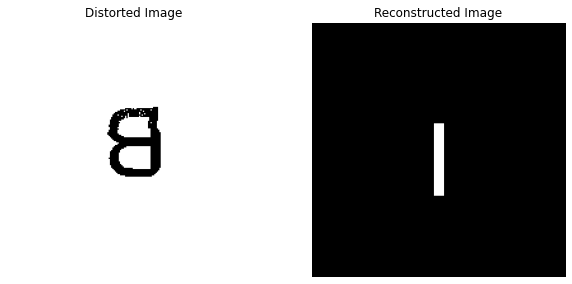

In [121]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Parameters
characters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!@#$%^&()')
image_size = (200, 200)
input_shape = (*image_size, 4)  # 4 for RGBA
n_classes = len(characters)

# Load the trained model
model = keras.models.load_model('trained_model.h5')  # Replace 'trained_model.h5' with your trained model file

# Load the distorted image
distorted_image_path = 'distorted_outlined_B_2.png'  # Replace with the path to your distorted image
distorted_image = load_img(distorted_image_path, target_size=image_size, color_mode='rgba')
distorted_image_array = img_to_array(distorted_image)
distorted_image_array = distorted_image_array.reshape(1, *distorted_image_array.shape)

# Normalize the pixel values
distorted_image_array = distorted_image_array / 255.0

# Predict the label for the distorted image
predicted_labels = model.predict(distorted_image_array)
predicted_label_index = np.argmax(predicted_labels)
predicted_label = characters[predicted_label_index]

print('Predicted Label:', predicted_label)

# Load the corresponding original image
original_image_path = f'outlined_letter_{predicted_label}.png'  # Replace with the path to your original image directory
original_image = load_img(original_image_path, target_size=image_size, color_mode='rgba')
original_image_array = img_to_array(original_image)

# Invert the colors of the original image
inverted_image_array = 255 - original_image_array.astype(np.uint8)

# Display the distorted and reconstructed images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(distorted_image)
axes[0].set_title('Distorted Image')
axes[0].axis('off')
axes[1].imshow(inverted_image_array)
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')
plt.show()
